# About the Dataset
- Customer ID =  A unique identification number that identifies the customer.
- Age = The customer's age.
- Gender =The customer's gender (Female, Male, etc.).
- Item Purchased = The name of the product the customer purchased.
- Category = The category the product belongs to (e.g., clothing, electronics).
- Purchase Amount (USD) = The total amount of the customer's purchase (in US dollars).
- Location = The geographic region or city where the customer is located.
- Size = The size of the purchased item (e.g., S, M, L, XL).
- Color = The color of the purchased item.
- Season = The season when the purchase occurred (e.g., summer, winter).
- Review Rating = The rating given by the customer about the product (usually on a scale of 1-5).
- Subscription Status = Whether the customer is a subscriber.
- Payment Method = The payment method the customer uses to pay (e.g., credit card, PayPal).
- Shipping Type = How the product is shipped (e.g., standard shipping, express shipping).
- Discount Applied = The discount rate applied at the time of purchase.
- Promo Code Used = The promotional code the customer used during the purchase.
- Previous Purchases = A list of the customer's past purchases.
- Preferred Payment Method = The customer's preferred payment method.
- Frequency of Purchases = How often the customer makes purchases (e.g., once a week, once a month).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [3]:
df= pd.read_csv("/kaggle/input/customer-shopping-latest-trends-dataset/shopping_trends.csv")
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
df1=df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [9]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

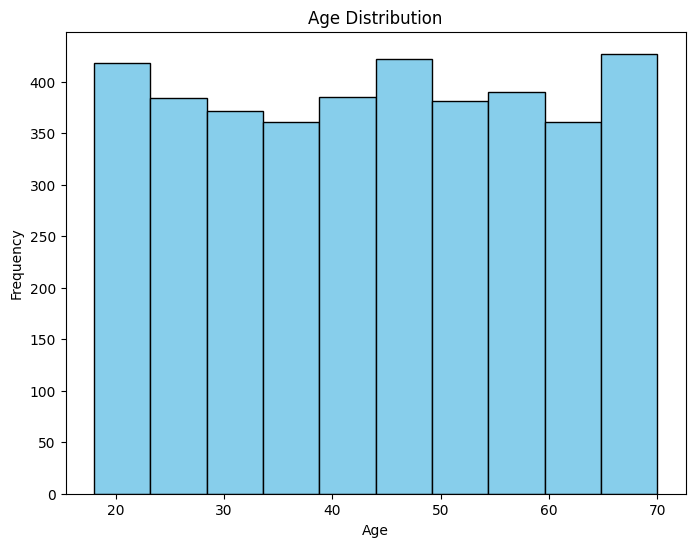

In [11]:
plt.figure(figsize=(8,6))
plt.hist(df.Age, bins=10, color= 'skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [16]:
gender_counts = df['Gender'].value_counts()
gender_counts

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [17]:
df['Gender'].value_counts(normalize = True)

Gender
Male      0.68
Female    0.32
Name: proportion, dtype: float64

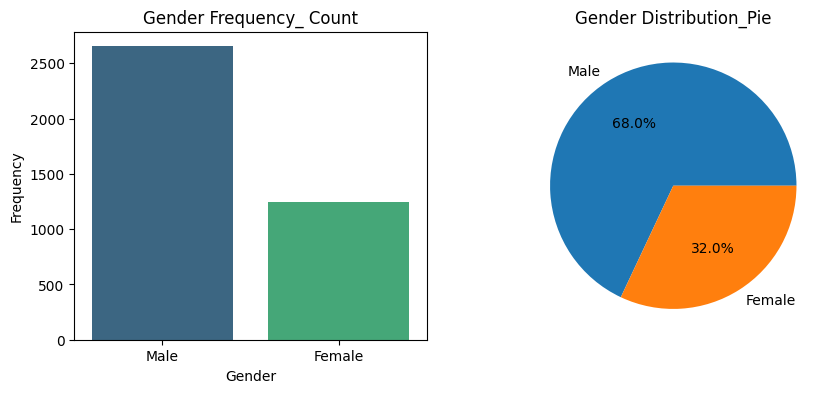

In [20]:
fig, axes = plt.subplots(1,2,figsize= (10,4))
sns.countplot(data=df, x= "Gender", palette= 'viridis', ax= axes[0])
axes[0].set_title('Gender Frequency_ Count')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Frequency')

axes[1].pie(gender_counts,labels= gender_counts.index, autopct='%1.1f%%')
axes[1].set_title('Gender Distribution_Pie')
plt.show()

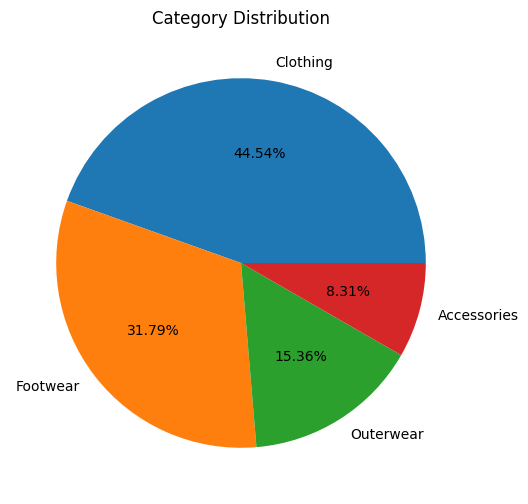

In [22]:
plt.figure(figsize=(8,6))
plt.pie(df.Category.value_counts(), labels= df.Category.unique(), autopct='%1.2f%%')
plt.title('Category Distribution')
plt.show()

In [24]:
df['Purchase Amount (USD)'].describe()

count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase Amount (USD), dtype: float64

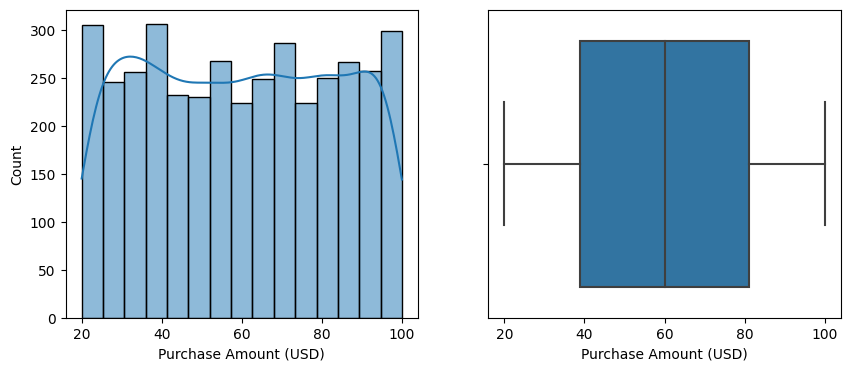

In [27]:
fig, axes = plt.subplots(1,2,figsize= (10,4))

sns.histplot(data=df, x= 'Purchase Amount (USD)', ax= axes[0], kde= True)
sns.boxplot(data=df, x= 'Purchase Amount (USD)', ax= axes[1])
plt.show()

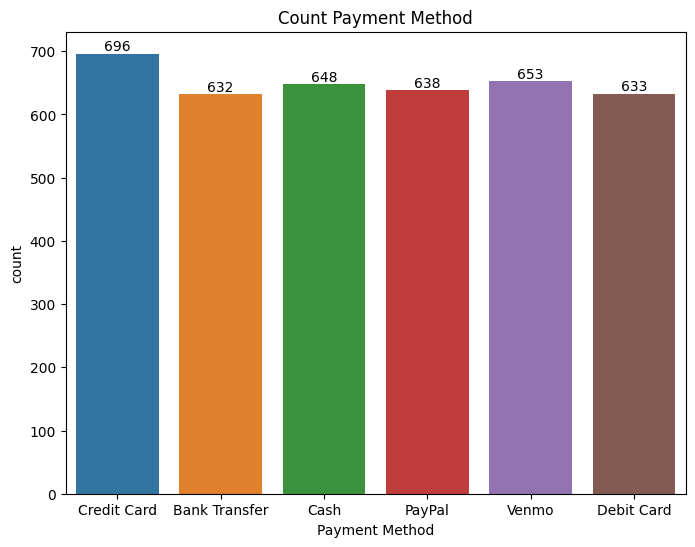

In [29]:
plt.figure(figsize = (8,6))

ax = sns.countplot(x = df['Payment Method'])

for i in ax.containers:
    ax.bar_label(i)
    
plt.title('Count Payment Method')
plt.show()

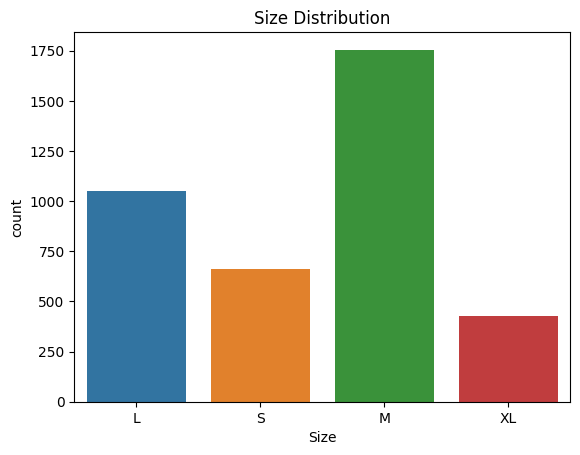

In [40]:
plt.figsize=(10,6)
sns.countplot(data= df, x= 'Size')
plt.title('Size Distribution')
plt.show()

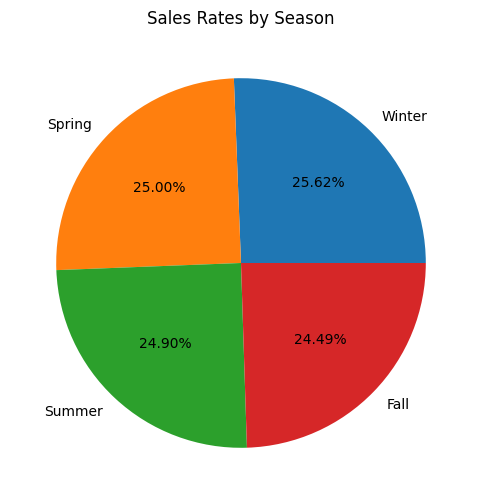

In [33]:
plt.figure(figsize = (8,6))
plt.pie(df['Season'].value_counts(), labels = df['Season'].unique(), autopct = '%1.2f%%')
plt.title("Sales Rates by Season")
plt.show()

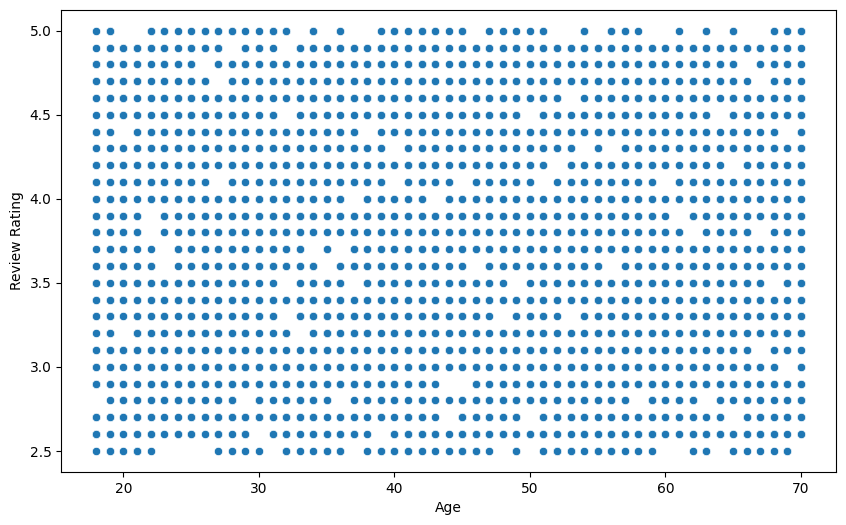

In [35]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = 'Age', y = 'Review Rating')
plt.show()

In [37]:
df.Location.value_counts().head(10)

Location
Montana       96
California    95
Idaho         93
Illinois      92
Alabama       89
Minnesota     88
Nebraska      87
New York      87
Nevada        87
Maryland      86
Name: count, dtype: int64

In [38]:
import folium
from geopy.geocoders import Nominatim

data = {
    "Location": ["Montana", "California", "Idaho", "Illinois", "Alabama", 
                 "Minnesota", "Nebraska", "New York", "Nevada", "Maryland"],
    "Score": [96, 95, 93, 92, 89, 88, 87, 87, 87, 86]
}

geolocator = Nominatim(user_agent="state_location_map")

map_center = [37.0902, -95.7129]  
m = folium.Map(location=map_center, zoom_start=5)

for i, row in enumerate(data['Location']):
    try:
        location = geolocator.geocode(row + ", USA", timeout=10)  
        if location:
            folium.Marker(
                location=[location.latitude, location.longitude],
                popup=f"{row}: {data['Score'][i]}",
                icon=folium.Icon(color='blue', icon='info-sign')
            ).add_to(m)
    except Exception as e:
        print(f"Error with {row}: {e}")

m.save("state_location_map.html")
m

# This data set was used for training purposes and the participants in the training;

- https://www.kaggle.com/ozanmhrc
- https://www.kaggle.com/masidekabakci
- https://www.kaggle.com/teacherbabur
- https://www.kaggle.com/hanifesin
- https://www.kaggle.com/nuriyedezcan
- https://www.kaggle.com/gaygisizsoegov
- https://www.kaggle.com/fatmayerlikayazkurt
- https://www.kaggle.com/sema kurt